#### SANYA GARG

#### 20BCE1853

#### SMART BRIDGE EXTERNSHIP - APPLIED DATA SCIENCE

#### ASSIGNMENT 2

1. Download the Dataset
2. Load the Dataset

In [15]:
# Import the library
import pandas as pd

# Read the Dataset
data = pd.read_csv('titanic.csv')

print(data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


3. Perform Below Visualizations.

● Univariate Analysis

● Bi - Variate Analysis

● Multi - Variate Analysis

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Univariate Analysis

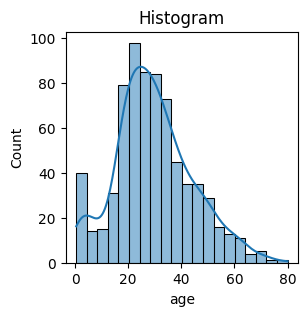

In [17]:
# Histogram
plt.figure(figsize=(3, 3))
sns.histplot(data=data, x='age', kde=True)
plt.title('Histogram')
plt.show()

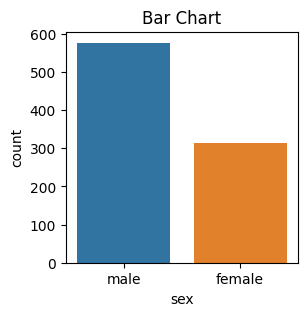

In [18]:
# Bar Chart
plt.figure(figsize=(3, 3))
sns.countplot(data=data, x='sex')
plt.title('Bar Chart')
plt.show()

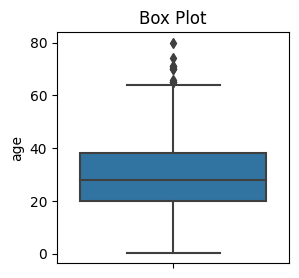

In [19]:
# Box Plot
plt.figure(figsize=(3, 3))
sns.boxplot(data=data, y='age')
plt.title('Box Plot')
plt.show()

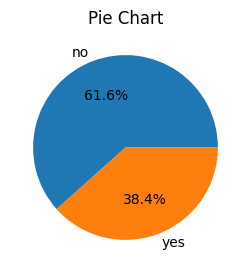

In [20]:
# Pie Chart
plt.figure(figsize=(3, 3))
data['alive'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart')
plt.ylabel('')
plt.show()

Bivariate Analysis

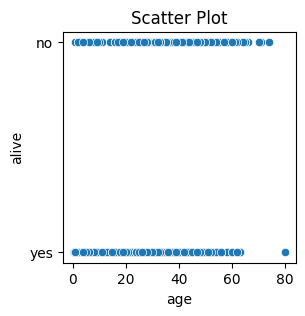

In [21]:
# Scatter Plot
plt.figure(figsize=(3, 3))
sns.scatterplot(data=data, x='age', y='alive')
plt.title('Scatter Plot')
plt.show()

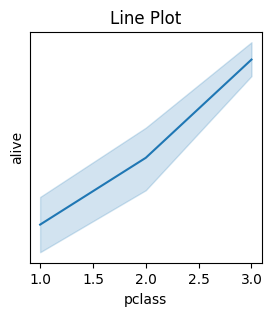

In [22]:
# Line Plot
plt.figure(figsize=(3, 3))
sns.lineplot(data=data, x='pclass', y='alive')
plt.title('Line Plot')
plt.show()

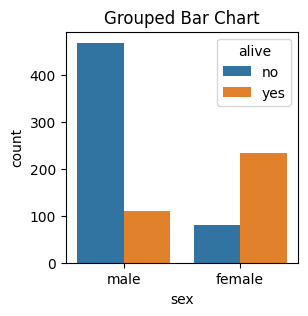

In [23]:
# Grouped Bar Chart
plt.figure(figsize=(3, 3))
sns.countplot(data=data, x='sex', hue='alive')
plt.title('Grouped Bar Chart')
plt.show()

Multivariate Analysis

<ipython-input-24-4f28ca21e240>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


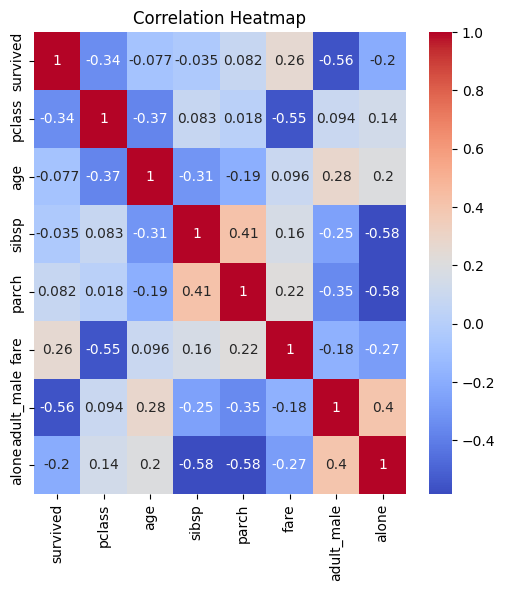

In [24]:
# Heatmap
plt.figure(figsize=(6, 6))
corr_matrix = data.corr()  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

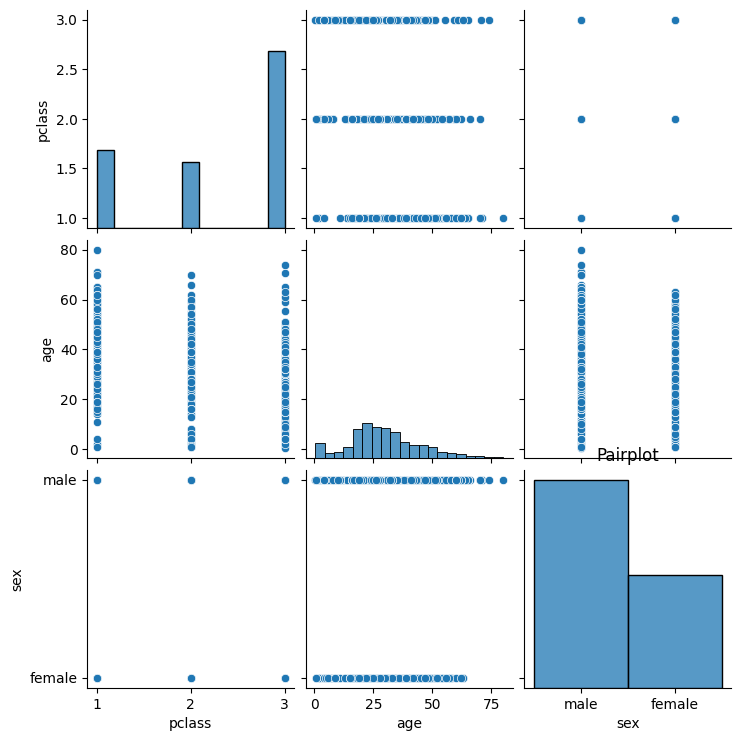

In [25]:
# Pairplot
sns.pairplot(data, vars=['pclass', 'age', 'sex'])  
plt.title('Pairplot')
plt.show()

4. Perform descriptive statistics on the dataset.

In [26]:
# Descriptive statistics
statistics = data.describe()

print(statistics)

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


5. Handle the Missing values.

In [27]:
# Check for missing values
missing_values = data.isnull()

# Count the number of missing values in each column
missing_counts = missing_values.sum()

# Print the missing value counts
print(missing_counts)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


Columns 'Age' and 'Deck' has missing values.

In [28]:
# Handle missing values with mean imputation
# Age
data['age'].fillna(data['age'].mean(), inplace=True)
# Deck
data['deck'].fillna(data['deck'].mode(), inplace=True)

6. Find the outliers and replace the outliers.

In [29]:
data['sex']=data.sex.replace(['male','female'], [1,2] )

In [30]:
import numpy as np

# Define a function to identify outliers
def find_outliers(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    lower_bound = mean - (threshold * std)
    upper_bound = mean + (threshold * std)
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Specify the column(s) to check for outliers
columns_to_check = ['age', 'sex','pclass']

# Find outliers in the specified columns
outliers = data[columns_to_check].apply(find_outliers)

# Replace outliers with a specified value
replacement_value = 0
for column in columns_to_check:
    data.loc[outliers[column], column] = replacement_value

# Print the modified DataFrame
print(data)

     survived  pclass  sex        age  sibsp  parch     fare embarked   class  \
0           0       3    1  22.000000      1      0   7.2500        S   Third   
1           1       1    2  38.000000      1      0  71.2833        C   First   
2           1       3    2  26.000000      0      0   7.9250        S   Third   
3           1       1    2  35.000000      1      0  53.1000        S   First   
4           0       3    1  35.000000      0      0   8.0500        S   Third   
..        ...     ...  ...        ...    ...    ...      ...      ...     ...   
886         0       2    1  27.000000      0      0  13.0000        S  Second   
887         1       1    2  19.000000      0      0  30.0000        S   First   
888         0       3    2  29.699118      1      2  23.4500        S   Third   
889         1       1    1  26.000000      0      0  30.0000        C   First   
890         0       3    1  32.000000      0      0   7.7500        Q   Third   

       who  adult_male deck

7. Check for Categorical columns and perform encoding.

In [31]:
# Check for categorical columns
categorical_columns = data.select_dtypes(include='object').columns.tolist()

In [32]:
# Perform one-hot encoding
df = pd.get_dummies(data, columns=categorical_columns)

print(df)

     survived  pclass  sex        age  sibsp  parch     fare  adult_male  \
0           0       3    1  22.000000      1      0   7.2500        True   
1           1       1    2  38.000000      1      0  71.2833       False   
2           1       3    2  26.000000      0      0   7.9250       False   
3           1       1    2  35.000000      1      0  53.1000       False   
4           0       3    1  35.000000      0      0   8.0500        True   
..        ...     ...  ...        ...    ...    ...      ...         ...   
886         0       2    1  27.000000      0      0  13.0000        True   
887         1       1    2  19.000000      0      0  30.0000       False   
888         0       3    2  29.699118      1      2  23.4500       False   
889         1       1    1  26.000000      0      0  30.0000        True   
890         0       3    1  32.000000      0      0   7.7500        True   

     alone  embarked_C  ...  deck_C  deck_D  deck_E  deck_F  deck_G  \
0    False      

8. Split the data into dependent and independent variables.

In [33]:
# All variables except the target variable are independent variables
X = df.drop(['survived'], axis=1) # Independent variables
y = df['survived'] # Dependent variable

In [34]:
print(X)

     pclass  sex        age  sibsp  parch     fare  adult_male  alone  \
0         3    1  22.000000      1      0   7.2500        True  False   
1         1    2  38.000000      1      0  71.2833       False  False   
2         3    2  26.000000      0      0   7.9250       False   True   
3         1    2  35.000000      1      0  53.1000       False  False   
4         3    1  35.000000      0      0   8.0500        True   True   
..      ...  ...        ...    ...    ...      ...         ...    ...   
886       2    1  27.000000      0      0  13.0000        True   True   
887       1    2  19.000000      0      0  30.0000       False   True   
888       3    2  29.699118      1      2  23.4500       False  False   
889       1    1  26.000000      0      0  30.0000        True   True   
890       3    1  32.000000      0      0   7.7500        True   True   

     embarked_C  embarked_Q  ...  deck_C  deck_D  deck_E  deck_F  deck_G  \
0             0           0  ...       1       

In [35]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64


9. Scale the independent variables.

In [36]:
# Create a StandardScaler object
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
min_max_scaler = MinMaxScaler()

# Fit and transform the dataset using MinMaxScaler
scaled_df = min_max_scaler.fit_transform(df)

print(scaled_df)

[[0. 1. 0. ... 1. 1. 0.]
 [1. 0. 1. ... 0. 0. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 ...
 [0. 1. 1. ... 1. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 1. 0.]]


10. Split the data into training and testing.

In [37]:
# Splitting into Training and Testing Data Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)